## STEP 0. Intro: Libraries

In [150]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [151]:
# Compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import random
random_value = 1

In [152]:
# Import libraries to be used, make sure they are all installed
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
from IPython.display import display_html
import seaborn as sns
import shap

## STEP 1. Import Data

In [153]:
# Load dataset
file = "https://raw.githubusercontent.com/ivanksinggih/Intel_minifab_Anylogic/data/final_data_values.csv"
data_title = ['total_captures_queue_A_per_week', 'total_captures_queue_B_per_week', 'total_captures_queue_C_per_week', 'total_captures_queue_D_per_week', 'total_captures_queue_E_per_week', 'total_captures_queue_AB_per_week', 'total_captures_queue_CD_per_week', 'total_captures_queue_A_1_per_week', 'total_captures_queue_A_5_per_week', 'total_captures_queue_B_1_per_week', 'total_captures_queue_B_5_per_week', 'total_captures_queue_C_2_per_week', 'total_captures_queue_C_4_per_week', 'total_captures_queue_D_2_per_week', 'total_captures_queue_D_4_per_week', 'total_captures_queue_E_3_per_week', 'total_captures_queue_E_6_per_week', 'machine_A_step1_per_week', 'machine_A_step5_per_week', 'machine_B_step1_per_week', 'machine_B_step5_per_week', 'machine_C_step2_per_week', 'machine_C_step4_per_week', 'machine_D_step2_per_week', 'machine_D_step4_per_week', 'machine_E_step3_per_week', 'machine_E_step6_per_week', 'machine_A_available_production_time_with_idle per week', 'machine_B_available_production_time_with_idle per week', 'machine_C_available_production_time_with_idle per week', 'machine_D_available_production_time_with_idle per week', 'machine_E_available_production_time_with_idle per week', 'machine_A_utilization_all_working_times per week', 'machine_B_utilization_all_working_times per week', 'machine_C_utilization_all_working_times per week', 'machine_D_utilization_all_working_times per week', 'machine_E_utilization_all_working_times per week', 'machine_A_idle_time_percentage per week', 'machine_B_idle_time_percentage per week', 'machine_C_idle_time_percentage per week', 'machine_D_idle_time_percentage per week', 'machine_E_idle_time_percentage per week', 'throughput_per_week']

dataset = read_csv(file, names=data_title)
dataset

total_captures_queue_A_per_week  total_captures_queue_B_per_week  \
0                             3.910714                         3.767857   
1                             3.839286                         3.970238   
2                             4.345238                         4.247024   
3                             3.788690                         3.660714   
4                             4.526786                         4.074405   
...                                ...                              ...   
10081                         4.244048                         4.083333   
10082                         3.925595                         3.437500   
10083                         4.297619                         4.196429   
10084                         4.250000                         3.860119   
10085                         4.345238                         3.764881   

       total_captures_queue_C_per_week  total_captures_queue_D_per_week  \
0                             0.901786                         0.675595   
1                             0.720238                         0.413690   
2                             0.928571                         0.565476   
3                             1.255952                         0.883929   
4                             0.889881                         0.616071   
...                                ...                              ...   
10081                         1.014881                         0.538690   
10082                         0.717262                         0.505952   
10083                         0.928571                         0.627976   
10084                         0.848214                         0.589286   
10085                         1.035714                         0.601190   

       total_captures_queue_E_per_week  total_captures_queue_AB_per_week  \
0                             3.815476                          7.678571   
1                             4.333333                          7.809524   
2                             3.571429                          8.592262   
3                             5.357143                          7.449405   
4                             4.151786                          8.601190   
...                                ...                               ...   
10081                         4.002976                          8.327381   
10082                         5.017857                          7.363095   
10083                         5.389881                          8.494048   
10084                         4.443452                          8.110119   
10085                         5.883929                          8.110119   

       total_captures_queue_CD_per_week  total_captures_queue_A_1_per_week  \
0                              1.577381                           1.437500   
1                              1.133929                           1.363095   
2                              1.494048                           1.723214   
3                              2.139881                           1.226190   
4                              1.505952                           2.062500   
...                                 ...                                ...   
10081                          1.553571                           1.681548   
10082                          1.223214                           1.169643   
10083                          1.556548                           1.482143   
10084                          1.437500                           1.857143   
10085                          1.636905                           1.604167   

       total_captures_queue_A_5_per_week  total_captures_queue_B_1_per_week  \
0                               2.568452                           1.687500   
1                               2.571429                           1.422619   
2                               2.717262                           1.785714   
3                               2.65773

In [154]:
#Checking missing values

dataset.isnull().sum()/len(dataset)*100

total_captures_queue_A_per_week                           0.0
total_captures_queue_B_per_week                           0.0
total_captures_queue_C_per_week                           0.0
total_captures_queue_D_per_week                           0.0
total_captures_queue_E_per_week                           0.0
total_captures_queue_AB_per_week                          0.0
total_captures_queue_CD_per_week                          0.0
total_captures_queue_A_1_per_week                         0.0
total_captures_queue_A_5_per_week                         0.0
total_captures_queue_B_1_per_week                         0.0
total_captures_queue_B_5_per_week                         0.0
total_captures_queue_C_2_per_week                         0.0
total_captures_queue_C_4_per_week                         0.0
total_captures_queue_D_2_per_week                         0.0
total_captures_queue_D_4_per_week                         0.0
total_captures_queue_E_3_per_week                         0.0
total_ca

In [155]:
#Changing into binary variables first

dataset.loc[dataset["throughput_per_week"] == "good", "throughput_per_week"] = 1
dataset.loc[dataset["throughput_per_week"] == "bad", "throughput_per_week"] = 0

dataset

total_captures_queue_A_per_week  total_captures_queue_B_per_week  \
0                             3.910714                         3.767857   
1                             3.839286                         3.970238   
2                             4.345238                         4.247024   
3                             3.788690                         3.660714   
4                             4.526786                         4.074405   
...                                ...                              ...   
10081                         4.244048                         4.083333   
10082                         3.925595                         3.437500   
10083                         4.297619                         4.196429   
10084                         4.250000                         3.860119   
10085                         4.345238                         3.764881   

       total_captures_queue_C_per_week  total_captures_queue_D_per_week  \
0                             0.901786                         0.675595   
1                             0.720238                         0.413690   
2                             0.928571                         0.565476   
3                             1.255952                         0.883929   
4                             0.889881                         0.616071   
...                                ...                              ...   
10081                         1.014881                         0.538690   
10082                         0.717262                         0.505952   
10083                         0.928571                         0.627976   
10084                         0.848214                         0.589286   
10085                         1.035714                         0.601190   

       total_captures_queue_E_per_week  total_captures_queue_AB_per_week  \
0                             3.815476                          7.678571   
1                             4.333333                          7.809524   
2                             3.571429                          8.592262   
3                             5.357143                          7.449405   
4                             4.151786                          8.601190   
...                                ...                               ...   
10081                         4.002976                          8.327381   
10082                         5.017857                          7.363095   
10083                         5.389881                          8.494048   
10084                         4.443452                          8.110119   
10085                         5.883929                          8.110119   

       total_captures_queue_CD_per_week  total_captures_queue_A_1_per_week  \
0                              1.577381                           1.437500   
1                              1.133929                           1.363095   
2                              1.494048                           1.723214   
3                              2.139881                           1.226190   
4                              1.505952                           2.062500   
...                                 ...                                ...   
10081                          1.553571                           1.681548   
10082                          1.223214                           1.169643   
10083                          1.556548                           1.482143   
10084                          1.437500                           1.857143   
10085                          1.636905                           1.604167   

       total_captures_queue_A_5_per_week  total_captures_queue_B_1_per_week  \
0                               2.568452                           1.687500   
1                               2.571429                           1.422619   
2                               2.717262                           1.785714   
3                               2.65773

## STEP 2: Feature Reduction

### 2a.  Low Variance Elimination

In [156]:
#Checking the variance value

dataset.var()

total_captures_queue_A_per_week                           9.106485e-02
total_captures_queue_B_per_week                           1.031118e-01
total_captures_queue_C_per_week                           2.123104e-02
total_captures_queue_D_per_week                           1.644978e-02
total_captures_queue_E_per_week                           4.483068e-01
total_captures_queue_AB_per_week                          3.193329e-01
total_captures_queue_CD_per_week                          6.741996e-02
total_captures_queue_A_1_per_week                         6.292933e-02
total_captures_queue_A_5_per_week                         6.752532e-02
total_captures_queue_B_1_per_week                         5.988713e-02
total_captures_queue_B_5_per_week                         6.653408e-02
total_captures_queue_C_2_per_week                         8.993554e-03
total_captures_queue_C_4_per_week                         7.713729e-03
total_captures_queue_D_2_per_week                         6.350043e-03
total_

In [157]:
#dataset.iloc[:,27:29]
#dataset.iloc[:,31:32]
#Removing the ones that it -23

d = dataset[list(dataset.columns[:27]) + list(dataset.columns[29:31]) + list(dataset.columns[32:])]
len(d.columns)
d.head(5)

total_captures_queue_A_per_week  total_captures_queue_B_per_week  \
0                         3.910714                         3.767857   
1                         3.839286                         3.970238   
2                         4.345238                         4.247024   
3                         3.788690                         3.660714   
4                         4.526786                         4.074405   

   total_captures_queue_C_per_week  total_captures_queue_D_per_week  \
0                         0.901786                         0.675595   
1                         0.720238                         0.413690   
2                         0.928571                         0.565476   
3                         1.255952                         0.883929   
4                         0.889881                         0.616071   

   total_captures_queue_E_per_week  total_captures_queue_AB_per_week  \
0                         3.815476                          7.678571   
1                         4.333333                          7.809524   
2                         3.571429                          8.592262   
3                         5.357143                          7.449405   
4                         4.151786                          8.601190   

   total_captures_queue_CD_per_week  total_captures_queue_A_1_per_week  \
0                          1.577381                           1.437500   
1                          1.133929                           1.363095   
2                          1.494048                           1.723214   
3                          2.139881                           1.226190   
4                          1.505952                           2.062500   

   total_captures_queue_A_5_per_week  total_captures_queue_B_1_per_week  ...  \
0                           2.568452                           1.687500  ...   
1                           2.571429                           1.422619  ...   
2                           2.717262                           1.785714  ...   
3                           2.657738                           1.184524  ...   
4                           2.559524                           1.437500  ...   

   machine_B_utilization_all_working_times per week  \
0                                         82.142857   
1                                         79.077381   
2                                         76.240079   
3                                         82.480159   
4                                         77.301588   

   machine_C_utilization_all_working_times per week  \
0                                         62.192460   
1                                         61.642982   
2                                         61.174479   
3                                         64.682540   
4                                         59.236112   

   machine_D_utilization_all_working_times per week  \
0                                         54.890873   
1                                         57.361111   
2                                         53.740079   
3                                         54.498683   
4                                         53.120365   

   machine_E_utilization_all_working_times per week  \
0                                         94.186508   
1                                         94.424603   
2                                         92.569444   
3                                         93.159397   
4                                         92.346556   

   machine_A_idle_time_percentage per week  \
0                                10.267857   
1                                 3.978175   
2                                 8.730159   
3                                 8.417984   
4                                 9.974874   

   machine_B_idle_time_percentage per week  \
0                                12.648810   
1                                15.714286   
2                                18.551587   
3    

In [158]:
d.var()

total_captures_queue_A_per_week                            0.091065
total_captures_queue_B_per_week                            0.103112
total_captures_queue_C_per_week                            0.021231
total_captures_queue_D_per_week                            0.016450
total_captures_queue_E_per_week                            0.448307
total_captures_queue_AB_per_week                           0.319333
total_captures_queue_CD_per_week                           0.067420
total_captures_queue_A_1_per_week                          0.062929
total_captures_queue_A_5_per_week                          0.067525
total_captures_queue_B_1_per_week                          0.059887
total_captures_queue_B_5_per_week                          0.066534
total_captures_queue_C_2_per_week                          0.008994
total_captures_queue_C_4_per_week                          0.007714
total_captures_queue_D_2_per_week                          0.006350
total_captures_queue_D_4_per_week               

### 2b. Correlation Analysis 

Initially there was 21 features if we didn't do the low variance elimination.
In addition, if we only use low variance elimination, we get 28/29 features, in which some of them has high correlation.

In [159]:
len(d.columns)

40

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


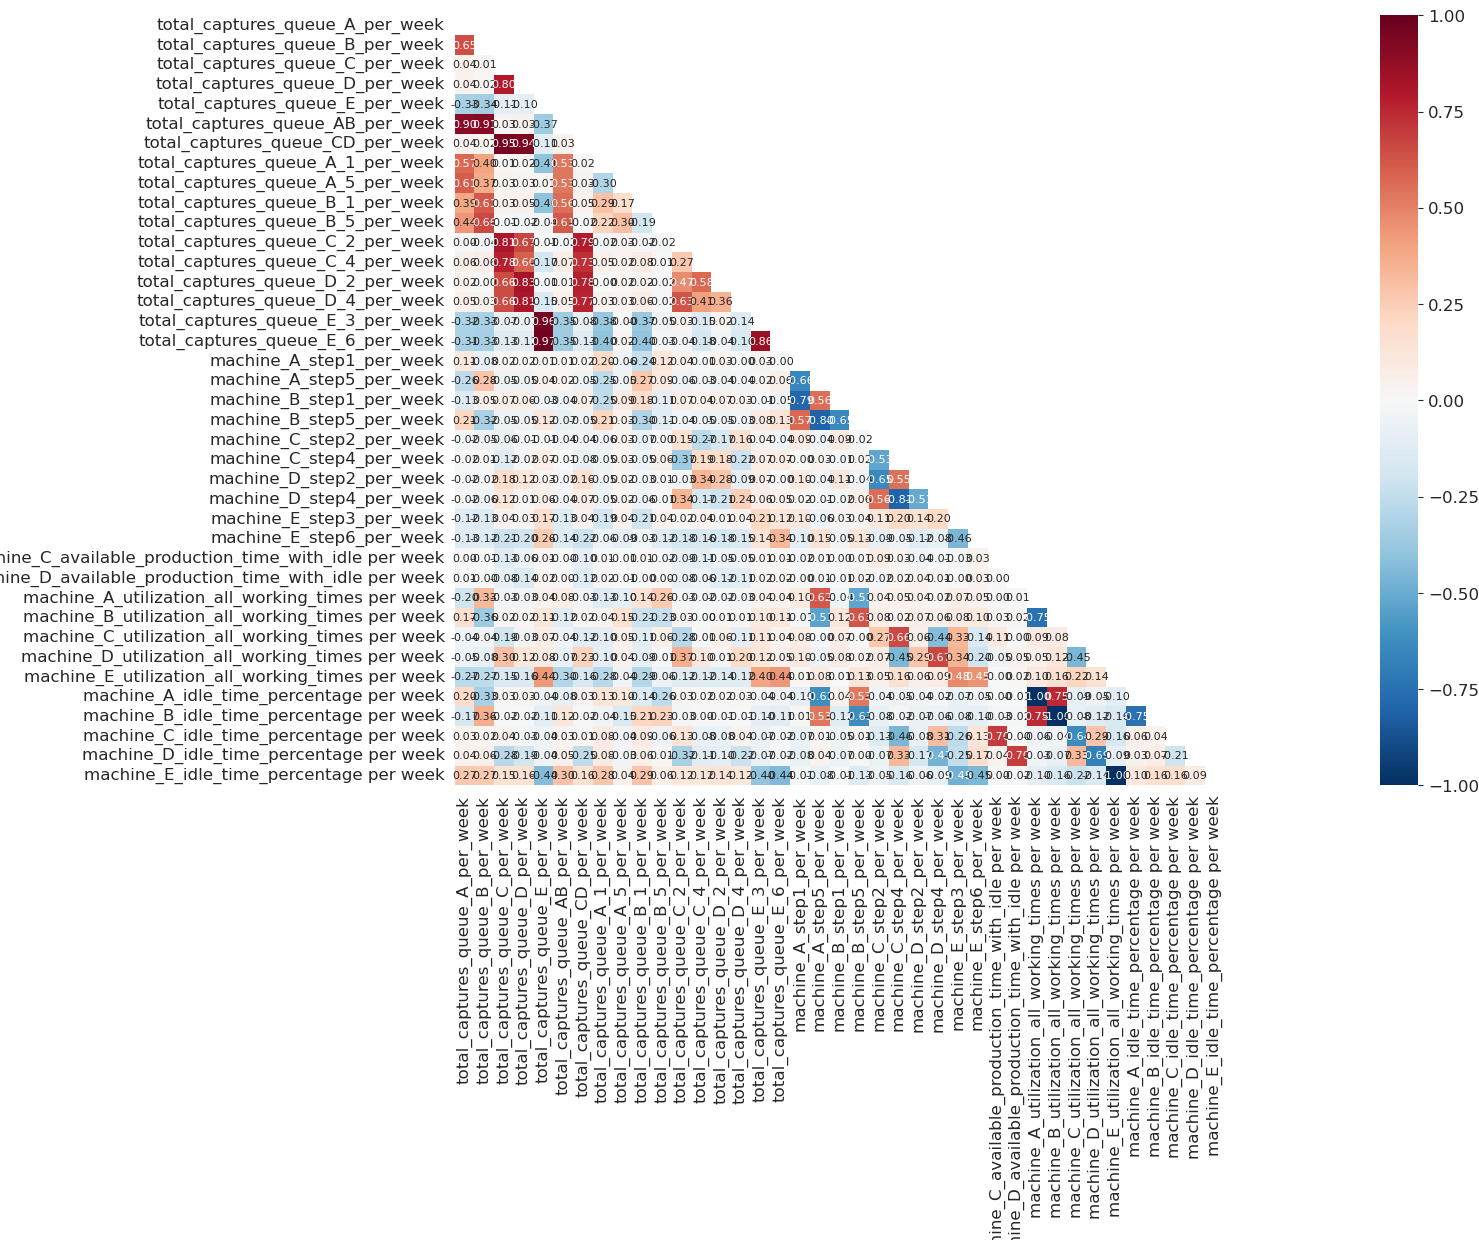

In [160]:
cor = d.corr()
mask = np.zeros_like(cor)
plt.rcParams['font.family']="Arial"
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(40,10))
    ax = sns.heatmap(cor, annot=True,annot_kws={"size": 8},fmt=".2f",
                     cmap=plt.cm.RdBu_r,linewidths=0,vmin=-1,vmax=1,mask=mask, square=True)

In [161]:
d2 = d[list(d.columns[7:34]) + list(d.columns[36:38])]
len(d2.columns)

29

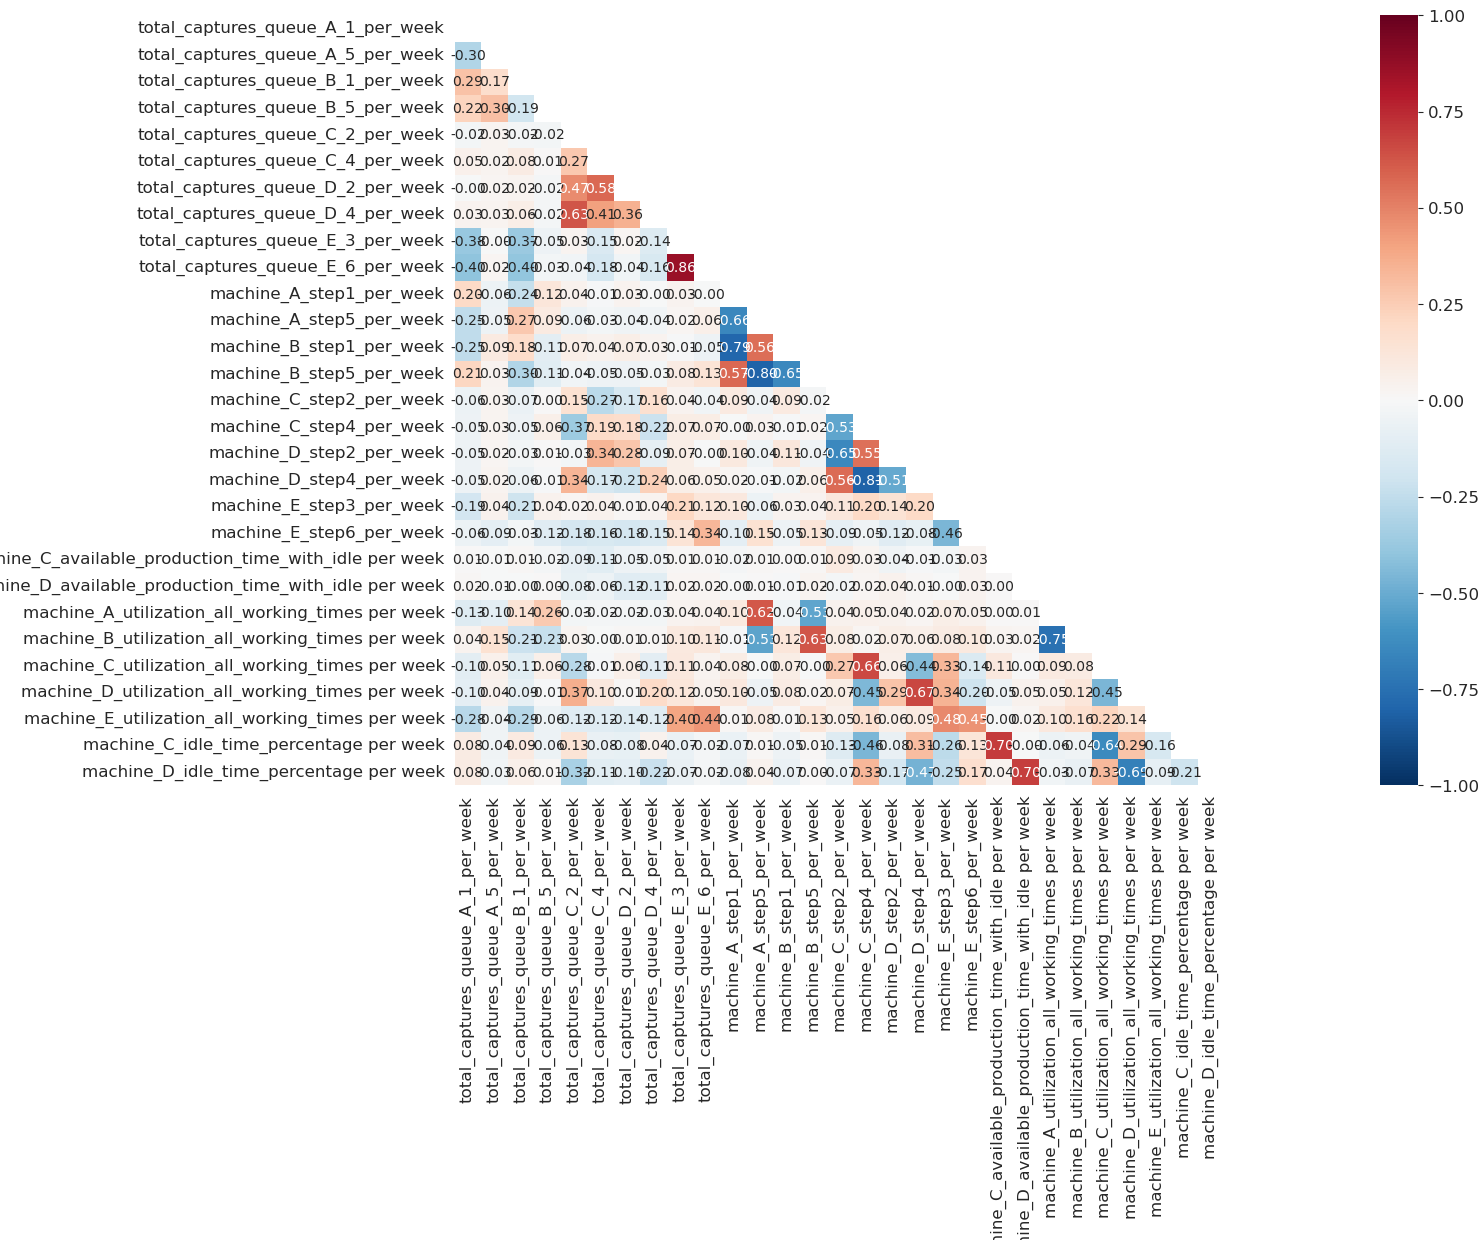

In [162]:
cor = d2.corr()
mask = np.zeros_like(cor)
plt.rcParams['font.family']="Arial"
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(40,10))
    ax = sns.heatmap(cor, annot=True,annot_kws={"size": 10},fmt=".2f",
                     cmap=plt.cm.RdBu_r,linewidths=0,vmin=-1,vmax=1,mask=mask, square=True)

In [163]:
d3 = d2[list(d2.columns[:8]) + list(d2.columns[9:10]) + list(d2.columns[12:14]) + list(d2.columns[16:22])+ list(d2.columns[23:27])]
len(d3.columns)

21

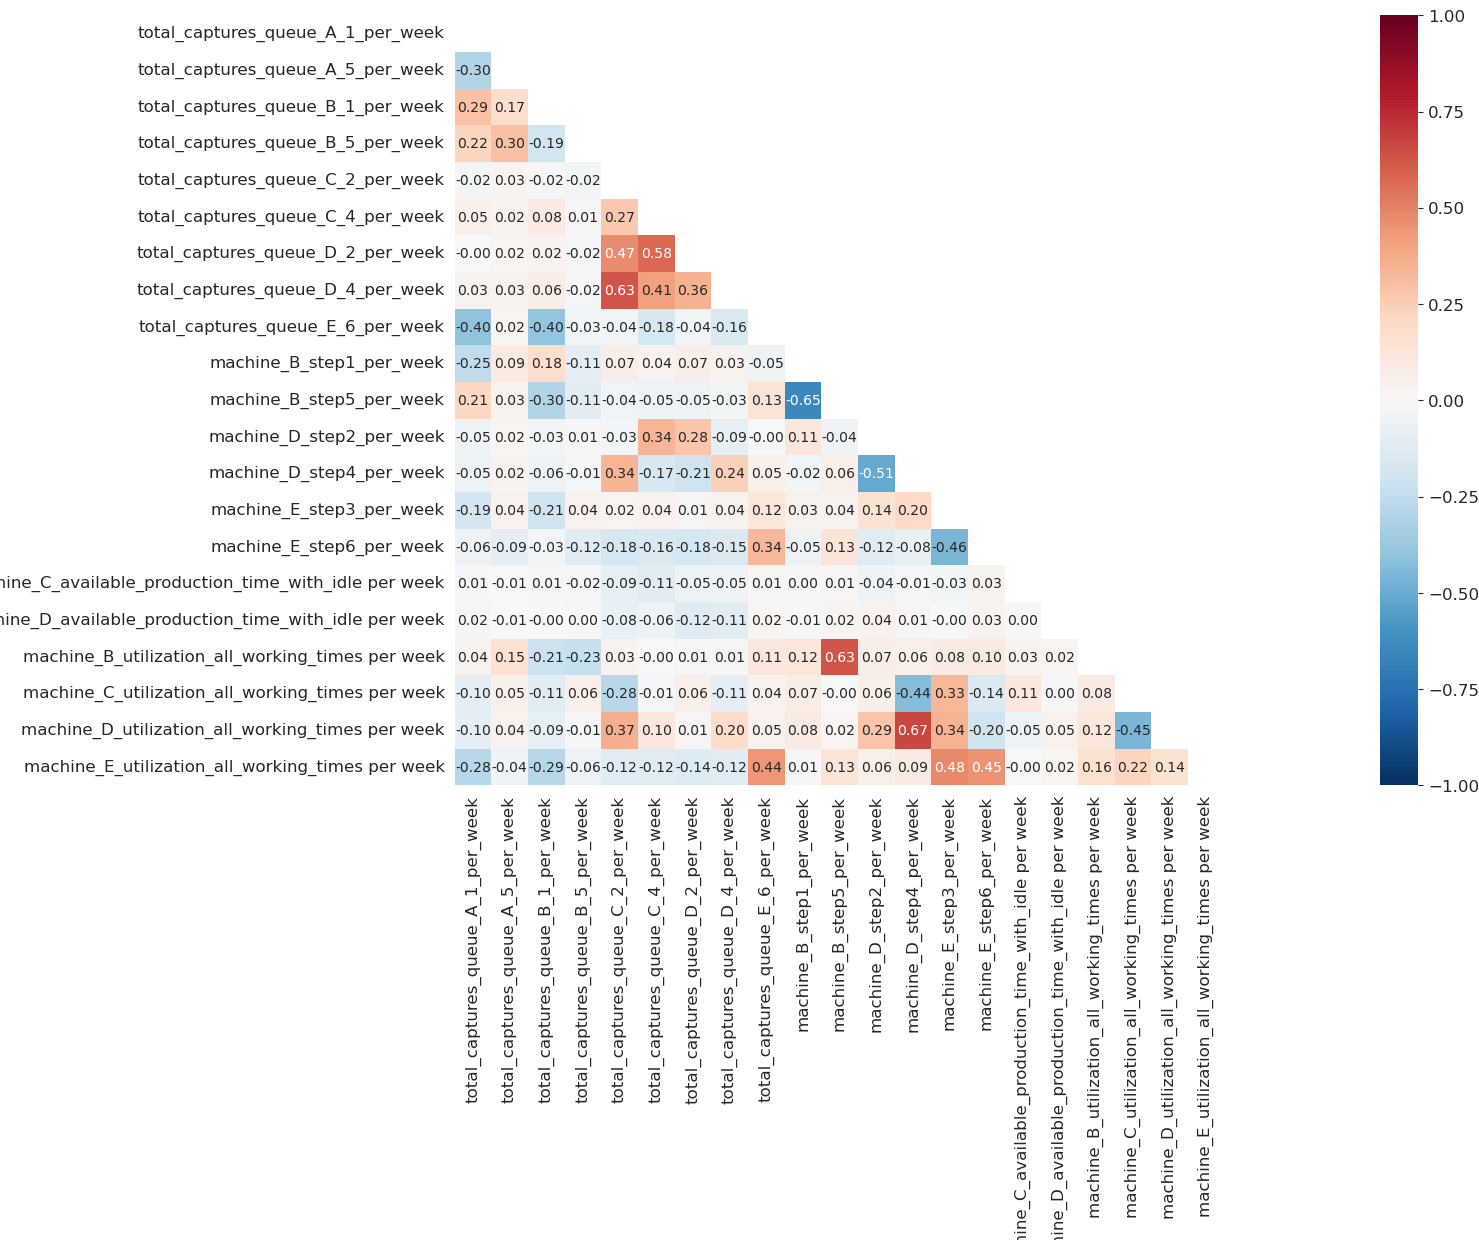

In [164]:
cor = d3.corr()
mask = np.zeros_like(cor)
plt.rcParams['font.family']="Arial"
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(40,10))
    ax = sns.heatmap(cor, annot=True,annot_kws={"size": 10},fmt=".2f",
                     cmap=plt.cm.RdBu_r,linewidths=0,vmin=-1,vmax=1,mask=mask, square=True)

## STEP 3. Preprocess Data and Standardize

We split the dataset randomly, where 20% of the dataset becomes a test set, and 80% of the dataset becomes a train set. It is possible to change this test size. We also present and measure the correlation between variables.

Results: 
Using Pearson Correlation, there are high correlations among a few features. After eliminating, there are 21 features left. Some of the modifications: Total captures queue, Machine Idle Time, Machine Step Time per week, Machine A utilization all working. See "df14" for more detailed info for feature removal. 

In [165]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

random_value = 1
X = d3 #array[:,0:len(data_title)-1]
y = dataset['throughput_per_week'] #array[:,len(data_title)-1]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_value)

#X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=random_value)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020) # Test set is 20% of the total data, and the random state is set to ensure identical results for each run

print("X_train's shape is", X_train.shape,"; y_train's shape is", y_train.shape)
print("X_test's shape is", X_test.shape,"; y_test's shape is", y_test.shape)

X_train's shape is (8068, 21) ; y_train's shape is (8068,)
X_test's shape is (2018, 21) ; y_test's shape is (2018,)


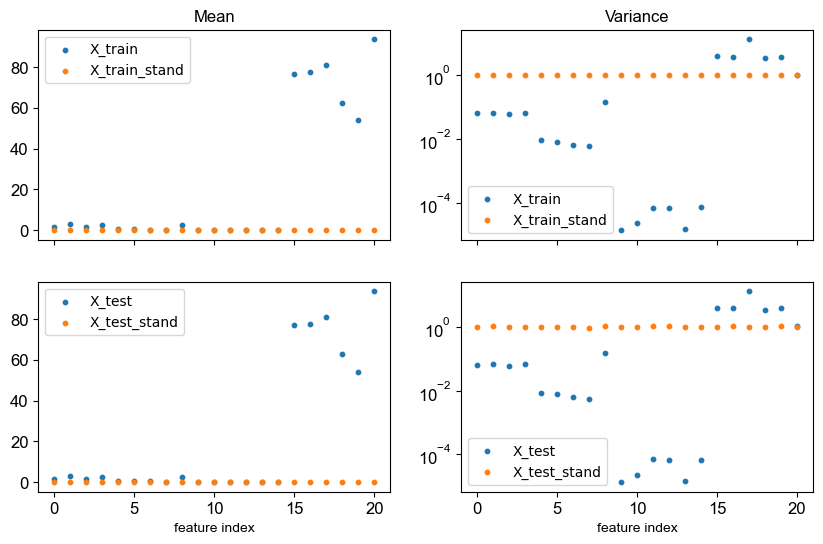

In [166]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

###############################################################################################
# UNCOMMENT THE PART BELOW IF YOU WANT TO STANDARDIZE THE X, AND COMMENT THE OTHER PART
###############################################################################################
scaler = StandardScaler()
scaler.fit(X_train)

X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test) 

# Take care to use the scaler fitted on the training set to transform the test set. Don't fit again on the test set.
###############################################################################################


# ###############################################################################################
# # UNCOMMENT THE PART BELOW IF YOU DON'T WANT TO STANDARDIZE THE X, AND COMMENT THE OTHER PART
# ###############################################################################################
# X_train_stand = X_train
# X_test_stand = X_test
# ###############################################################################################

#Visualize the mean and variance prior and after standardization
fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
plt.style.use('default')
ax[0,0].set_title("Mean")
ax[0,0].scatter(np.arange(X_train.shape[1]), np.mean(X_train, axis=0), s=10, label='X_train')
ax[0,0].scatter(np.arange(X_train_stand.shape[1]), np.mean(X_train_stand, axis=0), s=10, label='X_train_stand')
ax[0,0].legend()

ax[0,1].set_title("Variance")
ax[0,1].scatter(np.arange(X_train.shape[1]), np.var(X_train, axis=0), s=10, label='X_train')
ax[0,1].scatter(np.arange(X_train_stand.shape[1]), np.var(X_train_stand, axis=0), s=10, label='X_train_stand')
ax[0,1].set_yscale('log')
ax[0,1].legend()

ax[1,0].scatter(np.arange(X_test.shape[1]), np.mean(X_test, axis=0), s=10, label='X_test')
ax[1,0].scatter(np.arange(X_test_stand.shape[1]), np.mean(X_test_stand, axis=0), s=10, label='X_test_stand')
ax[1,0].set_xlabel("feature index")
ax[1,0].legend()

ax[1,1].scatter(np.arange(X_test.shape[1]), np.var(X_test, axis=0), s=10, label='X_test')
ax[1,1].scatter(np.arange(X_test_stand.shape[1]), np.var(X_test_stand, axis=0), s=10, label='X_test_stand')
ax[1,1].set_xlabel("feature index")
ax[1,1].set_yscale('log')
ax[1,1].legend()

#plt.subplots_adjust(wspace=0.3)
plt.show()

## STEP 4. Train the Dataset with Regression Algorithms

In [167]:
# A simple visulization functions

def prediction_vs_ground_truth_fig(y_train, y_train_hat, y_test, y_test_hat):
    from sklearn import metrics
    fontsize = 12
    plt.figure(figsize=(3.5,3))
    plt.style.use('default')
    plt.rc('xtick', labelsize=fontsize)
    plt.rc('ytick', labelsize=fontsize)
    plt.rcParams['font.family']="Arial"
    a = plt.scatter(y_train, y_train_hat, s=25,c='#b2df8a')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k:', lw=1.5)
    plt.xlabel('Observation', fontsize=fontsize)
    plt.ylabel('Prediction', fontsize=fontsize)
    #plt.xticks([0, 200, 400, 600])
    #plt.yticks([0, 200, 400, 600])
    #plt.tick_params(direction='in')
#     plt.text(450,80,'Scaled',family="Arial",fontsize=fontsize)
    #plt.xlim([-25,700]) 
    #plt.ylim([-25,700])
    plt.title(('Train Accuracy: {:.2%}'.format(metrics.accuracy_score(y_train, y_train_hat)),\
               'Test Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_test_hat))), fontsize=fontsize)
    b = plt.scatter(y_test, y_test_hat, s=25,c='#1f78b4')
    plt.legend((a,b),('Train','Test'),fontsize=fontsize,handletextpad=0.1,borderpad=0.1)
    plt.rcParams['font.family']="Arial"
    plt.tight_layout()

    plt.show()

### 4a. Logistic Regression
Using sklearn, we can import the logistic regression model to train the dataset.

In [168]:
X_train.to_numpy()

array([[ 1.45535714,  3.08928571,  1.33035714, ..., 61.11111111,
        53.26285558, 93.03571429],
       [ 2.2827381 ,  2.84821429,  1.69940476, ..., 60.2532676 ,
        54.36507937, 92.74889329],
       [ 1.64285714,  2.70238095,  1.58928571, ..., 60.76366169,
        52.94642857, 93.43231249],
       ...,
       [ 1.375     ,  3.3125    ,  1.70535714, ..., 60.11904762,
        55.64484127, 93.96825397],
       [ 1.375     ,  3.36309524,  1.625     , ..., 63.14484127,
        52.57936508, 93.26388889],
       [ 1.23511905,  3.13690476,  1.17559524, ..., 61.5377495 ,
        57.50005109, 95.07941617]])

In [169]:
from sklearn.linear_model import LogisticRegression

lr_regressor = LogisticRegression()

# Fit to the training set
lr = lr_regressor.fit(X_train.to_numpy(), y_train.to_numpy())

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [170]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)
explainer = shap.LinearExplainer(clf, X, feature_dependence="independent")
shap_values = explainer.shap_values(X)

plt.figure()
summary = shap.summary_plot(shap_values, X,plot_type = "bar",show = False)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})
plt.tight_layout()
d = {'Feature':list(X.columns),'Coefficients':np.round(np.abs(shap_values).mean(axis=0),3).tolist()}
coefdf = pd.DataFrame(d)
coefdf.head(20)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


Feature  Coefficients
0                   total_captures_queue_A_1_per_week         0.066
1                   total_captures_queue_A_5_per_week         0.108
2                   total_captures_queue_B_1_per_week         0.007
3                   total_captures_queue_B_5_per_week         0.104
4                   total_captures_queue_C_2_per_week         0.019
5                   total_captures_queue_C_4_per_week         0.012
6                   total_captures_queue_D_2_per_week         0.013
7                   total_captures_queue_D_4_per_week         0.006
8                   total_captures_queue_E_6_per_week         0.336
9                            machine_B_step1_per_week         0.000
10                           machine_B_step5_per_week         0.000
11                           machine_D_step2_per_week         0.000
12                           machine_D_step4_per_week         0.000
13                           machine_E_step3_per_week         0.000
14                           machine_E_step6_per_week         0.001
15  machine_C_available_production_time_with_idle ...         0.036
16  machine_D_available_production_time_with_idle ...         0.094
17   machine_B_utilization_all_working_times per week         0.160
18   machine_C_utilization_all_working_times per week         0.999
19   machine_D_utilization_all_working_times per week         1.117

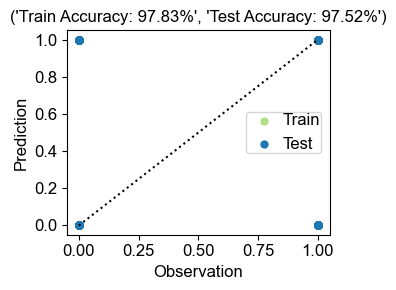

In [171]:
# Linear Regression
from sklearn.linear_model import LogisticRegression

lr_regressor = LogisticRegression()

# Fit to the training set
lr = lr_regressor.fit(X_train_stand, y_train)

# Perform predictions on both training and test sets
y_train_hat = lr_regressor.predict(X_train_stand)
y_test_hat = lr_regressor.predict(X_test_stand)

# Visualize the results
prediction_vs_ground_truth_fig(y_train, y_train_hat, y_test, y_test_hat)
# prediction_vs_ground_truth_both_fig(y_train, y_train_hat_std, y_test, y_test_hat_std,
#                                        y_train_hat_nonstd, y_test_hat_nonstd)
# print(np.abs(lr_regressor.coef_))

#### Coefficients of the Logistic Regression
Looking at the coefficients for the linear regression, we can try to understand which features are important for the model.

In [172]:
print('Base is :',lr.intercept_)

Base is : [3.22826231]


### 4b. K-Nearest Neighbors

Using sklearn, we can import the K-nearest neighbors regression model to train the dataset. We are also using GridSearchCV to find the optimum parameters. We also use 10-fold cross-validation within the grid search, to prevent overfitting.

In [173]:
# K Nearest Neighbors
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

def rfr_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator= KNeighborsClassifier(),
        param_grid={'weights': ['uniform', 'distance'],
                    'n_neighbors': range(2,20),
                    'algorithm': ['ball_tree','kd_tree','brute']
                   },
        cv=10, 
        scoring= 'accuracy',
        #'neg_mean_absolute_percentage_error',
        verbose=0,
        n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    return best_params
print('The best parameters: ',rfr_model(X_train_stand,y_train))

The best parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 18, 'weights': 'uniform'}


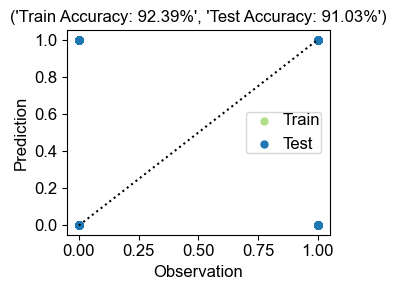

In [174]:
knn_classifier =  KNeighborsClassifier(algorithm='ball_tree',
                                   n_neighbors=18,
                                   weights='uniform')

# Fit to the training set
knn_classifier.fit(X_train_stand, y_train)
# Perform predictions on both training and test sets
y_train_hat = knn_classifier.predict(X_train_stand)
y_test_hat = knn_classifier.predict(X_test_stand)

# Visualize the results
prediction_vs_ground_truth_fig(y_train, y_train_hat, y_test, y_test_hat)

### 4c. Random Forest
Using sklearn, we can import the random forest regression model to train the dataset. We are also using GridSearchCV to find the optimum parameters. We also use 10-fold cross-validation within the grid search, to prevent overfitting.

In [175]:
X

total_captures_queue_A_1_per_week  total_captures_queue_A_5_per_week  \
0                               1.437500                           2.568452   
1                               1.363095                           2.571429   
2                               1.723214                           2.717262   
3                               1.226190                           2.657738   
4                               2.062500                           2.559524   
...                                  ...                                ...   
10081                           1.681548                           2.651786   
10082                           1.169643                           2.815476   
10083                           1.482143                           2.910714   
10084                           1.857143                           2.482143   
10085                           1.604167                           2.836310   

       total_captures_queue_B_1_per_week  total_captures_queue_B_5_per_week  \
0                               1.687500                           2.163690   
1                               1.422619                           2.619048   
2                               1.785714                           2.550595   
3                               1.184524                           2.565476   
4                               1.437500                           2.738095   
...                                  ...                                ...   
10081                           1.255952                           2.916667   
10082                           1.339286                           2.181548   
10083                           1.651786                           2.622024   
10084                           1.285714                           2.639881   
10085                           1.306548                           2.541667   

       total_captures_queue_C_2_per_week  total_captures_queue_C_4_per_week  \
0                               0.446429                           0.455357   
1                               0.383929                           0.336310   
2                               0.377976                           0.550595   
3                               0.744048                           0.511905   
4                               0.404762                           0.485119   
...                                  ...                                ...   
10081                           0.500000                           0.514881   
10082                           0.404762                           0.312500   
10083                           0.407738                           0.520833   
10084                           0.464286                           0.383929   
10085                           0.532738                           0.502976   

       total_captures_queue_D_2_per_week  total_captures_queue_D_4_per_week  \
0                               0.428571                           0.247024   
1                               0.232143                           0.181548   
2                               0.258929                           0.306548   
3                               0.366071                           0.517857   
4                               0.375000                           0.241071   
...                                  ...                                ...   
10081                           0.294643                           0.244048   
10082                           0.351190                           0.154762   
10083                           0.309524                           0.318452   
10084                           0.264881                           0.324405   
10085                           0.375000                           0.226190   

       total_captures_queue_E_6_per_week  machine_B_step1_per_week  ...  \
0                               2.250000                  0.038690  ...   
1                               2.592262                  0.0

In [176]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'max_depth': range(1,10), #change it from 1,5
            'n_estimators': (5,10,20,30,40,50,60,70,80,90,100,500,1000),
        },
        cv=10, 
        scoring= 'accuracy',
        #'neg_mean_absolute_percentage_error',
        verbose=0,
        n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],\
                                random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, 
                                cv=10, 
                                scoring= 'accuracy',
                                #'neg_mean_absolute_percentage_error',
                            )#'neg_mean_absolute_error')

    return best_params

print('The best parameters: ',rfr_model(X_train_stand,y_train))

The best parameters:  {'max_depth': 3, 'n_estimators': 70}


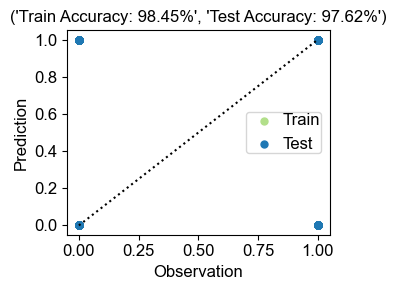

In [177]:
rf_classifier = RandomForestClassifier(n_estimators=20,
                                     max_depth =9,
                                     random_state=1)

# Fit to the training set
rf_classifier.fit(X_train_stand, y_train)
# Perform predictions on both training and test sets
y_train_hat = rf_classifier.predict(X_train_stand)
y_test_hat = rf_classifier.predict(X_test_stand)

# Visualize the results
#prediction_vs_ground_truth_fig(y_train, y_train_hat.astype('int'), y_test, y_test_hat.astype('int'))
prediction_vs_ground_truth_fig(y_train, y_train_hat, y_test, y_test_hat)

# rf_regressor.feature_importances_

### 4d. Gradient Boosting Decision Tree

Using sklearn, we can import the gradient boosting decision tree regression model to train the dataset. We are also using GridSearchCV to find the optimum parameters. We also use 10-fold cross-validation within the grid search, to prevent overfitting.

In [178]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=GradientBoostingClassifier(),
        param_grid={
            'max_depth': range(1,5),
            'n_estimators': (5,10,20,30,40,50,60,70,80,90,100,500,1000),
        },
        cv=10, 
        scoring= 'accuracy',
        #'neg_mean_absolute_percentage_error',
        verbose=0,
        n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    return best_params

print('The best parameters: ',rfr_model(X_train_stand,y_train))

The best parameters:  {'max_depth': 1, 'n_estimators': 5}


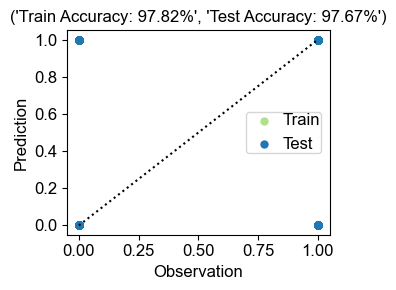

In [179]:
gb_classifier = GradientBoostingClassifier(max_depth = 1,
                                         n_estimators=5, random_state=1)

# Fit to the training set
gb_classifier.fit(X_train_stand, y_train)
# Perform predictions on both training and test sets
y_train_hat = gb_classifier.predict(X_train_stand)
y_test_hat = gb_classifier.predict(X_test_stand)

# Visualize the results
prediction_vs_ground_truth_fig(y_train, y_train_hat, y_test, y_test_hat)

### 4e. Neural Network (MLP Classifier)
Using sklearn, we can import the MLP (multi-layer perceptron) classifier model to train the dataset. This algorithm uses stochastic gradient descent. We are also using GridSearchCV to find the optimum parameters. We also use 10-fold cross-validation within the grid search, to prevent overfitting.

We also look at different activation functions: tanh, relu, and identity.

In [180]:
# Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

nn_classifier = MLPClassifier(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes': [(100,),(150,)],
    'activation': ['tanh', 'logistic'],#,'identity'],
    'solver': ['sgd','adam','lbfgs'],#, 'adam'],
    'alpha': [0.0001,0.001,0.01],#, 0.05],
    'learning_rate': ['constant','adaptive']#,'adaptive'],
}

# y_train.fillna(y_train.mean())
clf = GridSearchCV(nn_classifier, parameter_space, n_jobs=-1, cv=10)
clf.fit(X_train_stand, y_train)

print('The best parameters: \n', clf.best_params_)

The best parameters: 
 {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


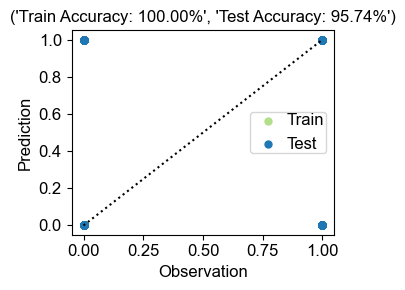

In [181]:
# nn_classifier = MLPClassifier(hidden_layer_sizes=(147,), max_iter=1000, solver='adam', random_state=1)
nn_classifier = MLPClassifier(hidden_layer_sizes =(150,),max_iter=1000,
                           learning_rate='constant',solver='lbfgs',alpha=0.0001,
                           activation='logistic')
#,random_state=10

# Fit to the training set
nn_classifier.fit(X_train_stand, y_train)
# Perform predictions on both training and test sets
y_train_hat = nn_classifier.predict(X_train_stand)
y_test_hat = nn_classifier.predict(X_test_stand)

# Visualize the results
prediction_vs_ground_truth_fig(y_train, y_train_hat, y_test, y_test_hat)

### 4f. Support Vector Machine-Classifier (SVC)
Using sklearn, we can import the support vector machine classifier model to train the dataset. This algorithm uses stochastic gradient descent. We are also using GridSearchCV to find the optimum parameters. We also use 10-fold cross-validation within the grid search, to prevent overfitting.

In [182]:
# SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=SVC(),
        param_grid={
            "C": [1e0,1e2,1e3,1e4,1e5,3e5,5e5,5.75e5,6e5,7e5,1e6,5e6],
#             "gamma": 'auto'
        },
        cv=10, 
        scoring= 'accuracy',
        #'neg_mean_absolute_percentage_error',
        verbose=0,
        n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    return best_params

print('The best parameters: \n',rfr_model(X_train_stand,y_train))

The best parameters: 
 {'C': 1.0}


In [183]:
print('The best parameters: \n',rfr_model(X,y))

The best parameters: 
 {'C': 5000000.0}


In [184]:
sv_classifier = SVC(C=5000000,kernel='rbf')

#SVC(C=300000,kernel='rbf')
#Not using the standardized data
#Otherwise, it'll be 100%

# Fit to the training set
sv_classifier.fit(X_train, y_train)
# Perform predictions on both training and test sets
y_train_hat = sv_classifier.predict(X_train)
y_test_hat = sv_classifier.predict(X_test)

# Visualize the results
prediction_vs_ground_truth_fig(y_train, y_train_hat, y_test, y_test_hat)

## Step 5. Model Selection: Cross-Validation
Cross-validation is a model selection technique that tests how well a model generalizes to an independent data set. The image below shows a k-fold cross validation where packets comprising of 1/k of data alternate to be the test data in every iteration. A score averaging all the test performances can be used to compare various models' performances.

In [243]:
from sklearn.model_selection import cross_val_score

###############################################################################################
# UNCOMMENT THE PART BELOW IF YOU WANT TO STANDARDIZE THE X, AND COMMENT THE OTHER PART
###############################################################################################
#Standardize all X
X_stand = scaler.transform(X)

# Take care to use the scaler fitted on the training set to transform the test set. Don't fit again on the test set.
###############################################################################################


###############################################################################################
# UNCOMMENT THE PART BELOW IF YOU DON'T WANT TO STANDARDIZE THE X, AND COMMENT THE OTHER PART
###############################################################################################
# X_stand = X

###############################################################################################

# Obtain cross-validation scores of various regressors
lr_score = cross_val_score(lr_regressor, X_stand, y, cv=10, scoring='accuracy')
knn_score = cross_val_score(knn_classifier, X_stand, y, cv=10, scoring='accuracy')
rf_score = cross_val_score(rf_classifier, X_stand, y, cv=10, scoring='accuracy')
gb_score = cross_val_score(gb_classifier, X_stand, y, cv=10, scoring='accuracy')
nn_score = cross_val_score(nn_classifier, X_stand, y, cv=10, scoring='accuracy')
svr_score = cross_val_score(sv_classifier,X_stand, y, cv=10, scoring='accuracy')

# Plot the cross-validation scores of the various regressors
fig,ax = plt.subplots(figsize=(6,5))
model = ['Logistic Regression', 'K Nearest Neighbors', 'Random Forest', 'Gradient Boosting', 'Neural Network','SVR']
scores = [np.mean(-lr_score)*100, np.mean(-knn_score)*100, np.mean(-rf_score)*100, np.mean(-gb_score)*100, np.mean(-nn_score)*100,np.mean(-svr_score)*100]
std  = [np.std(-lr_score)*100, np.std(-knn_score)*100, np.std(-rf_score)*100, np.std(-gb_score)*100, np.std(-nn_score)*100,np.std(-svr_score)*100]

#scores = [np.mean(lr_score)*100, np.mean(knn_score)*100, np.mean(rf_score)*100, np.mean(gb_score)*100, np.mean(nn_score)*100,np.mean(svr_score)*100]
#std  = [np.std(lr_score)*100, np.std(knn_score)*100, np.std(rf_score)*100, np.std(gb_score)*100, np.std(nn_score)*100,np.std(svr_score)*100]

print('RMSE scores for LR, KNN, RF, GB, NN, SVR: ' ,scores)
print('Std. dev: ',std)
fontsize = 12
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
ax.bar(model,scores,yerr=std,alpha=0.7, capsize=2)
ax.set_ylabel('Accuracy',fontsize=fontsize)
# ax.set_title('Cross Validation Score',fontsize=fontsize)
plt.xticks(rotation=90)
plt.show()
plt.rcParams['font.family']="Arial"

# Uncomment to save fig
# plt.tight_layout()
# fig.savefig('20200505_standardized_zoomin_CV_1.png', dpi = 1200,bbox_inches='tight')

RMSE scores for LR, KNN, RF, GB, NN, SVR:  [-97.72949211068635, -91.11639097330375, -97.7889569273365, -97.77903629241587, -96.29182594742556, -95.46902284204067]
Std. dev:  [0.46622641343660975, 0.5059970505761899, 0.48000492464805267, 0.48238297560255217, 0.4027216543621679, 0.5588516595922316]


In [242]:
# Plot the cross-validation scores of the various regressors
fig,ax = plt.subplots(figsize=(6,5))
model = ['Logistic Regression', 'K Nearest Neighbors', 'Random Forest', 'Gradient Boosting', 'Neural Network','SVR']
#scores = [np.mean(-lr_score)*100, np.mean(-knn_score)*100, np.mean(-rf_score)*100, np.mean(-gb_score)*100, np.mean(-nn_score)*100,np.mean(-svr_score)*100]
#std  = [np.std(-lr_score)*100, np.std(-knn_score)*100, np.std(-rf_score)*100, np.std(-gb_score)*100, np.std(-nn_score)*100,np.std(-svr_score)*100]

scores = [np.mean(lr_score)*100, np.mean(knn_score)*100, np.mean(rf_score)*100, np.mean(gb_score)*100, np.mean(nn_score)*100,np.mean(svr_score)*100]
std  = [np.std(lr_score)*100, np.std(knn_score)*100, np.std(rf_score)*100, np.std(gb_score)*100, np.std(nn_score)*100,np.std(svr_score)*100]



print('RMSE scores for LR, KNN, RF, GB, NN, SVR: ' ,scores)
print('Std. dev: ',std)
fontsize = 12
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
ax.bar(model,scores,yerr=std,alpha=0.7, capsize=2)
ax.set_ylabel('Accuracy',fontsize=fontsize)
# ax.set_title('Cross Validation Score',fontsize=fontsize)
plt.xticks(rotation=90)
plt.show()
plt.rcParams['font.family']="Arial"

# Uncomment to save fig
# plt.tight_layout()
# fig.savefig('20200505_standardized_zoomin_CV_1.png', dpi = 1200,bbox_inches='tight')

RMSE scores for LR, KNN, RF, GB, NN, SVR:  [97.72949211068635, 91.11639097330375, 97.79885789796593, 97.7889569273365, 96.08364009627637, 95.46902284204067]
Std. dev:  [0.46622641343660975, 0.5059970505761899, 0.4585981693129023, 0.48000492464805267, 0.4966185715302829, 0.5588516595922316]


## STEP 6. Using SHAP for Interpretability

To interpret the trained models, we are using SHAP (https://github.com/slundberg/shap). Shapley values come from game theory, and explain the allocation of each features to the output (this can be read further here: https://www.nature.com/articles/s42256-019-0138-9.epdf). We can use it on the tree-based algorithms, such as random forest regression and gradient boosting tree regression.

Also, note that you don't need to standardized/ normalized $X$ for partitioning algorithms, including all the tree-based algorithms, such as random forest (RF), or gradient boosting decision tree (GB) regressions. Tree-based algorithms are more robust to numerical instabilities. Since that's the case, we are going to retrain the RF and GB on non-standardized/ non-normalized values.

In [187]:
X_stand_df = X

In [188]:
X_stand = scaler.transform(X)
X_stan = pd.DataFrame(X_stand)
X_stan.columns = X_stand_df.columns
X_stan

total_captures_queue_A_1_per_week  total_captures_queue_A_5_per_week  \
0                              -0.411028                          -1.455593   
1                              -0.706868                          -1.444087   
2                               0.725000                          -0.880283   
3                              -1.251215                          -1.110407   
4                               2.074033                          -1.490111   
...                                  ...                                ...   
10081                           0.559329                          -1.133420   
10082                          -1.476054                          -0.500579   
10083                          -0.233523                          -0.132381   
10084                           1.257513                          -1.789272   
10085                           0.251655                          -0.420036   

       total_captures_queue_B_1_per_week  total_captures_queue_B_5_per_week  \
0                               0.960548                          -2.151556   
1                              -0.122227                          -0.384988   
2                               1.362027                          -0.650551   
3                              -1.095508                          -0.592820   
4                              -0.061397                           0.076859   
...                                  ...                                ...   
10081                          -0.803524                           0.769631   
10082                          -0.462875                          -2.082278   
10083                           0.814556                          -0.373442   
10084                          -0.681864                          -0.304165   
10085                          -0.596702                          -0.685189   

       total_captures_queue_C_2_per_week  total_captures_queue_C_4_per_week  \
0                               0.171870                           0.645203   
1                              -0.484081                          -0.707902   
2                              -0.546552                           1.727688   
3                               3.295445                           1.287928   
4                              -0.265430                           0.983480   
...                                  ...                                ...   
10081                           0.734114                           1.321756   
10082                          -0.265430                          -0.978524   
10083                          -0.234195                           1.389411   
10084                           0.359285                          -0.166660   
10085                           1.077707                           1.186445   

       total_captures_queue_D_2_per_week  total_captures_queue_D_4_per_week  \
0                               1.797643                           0.068787   
1                              -0.666119                          -0.786569   
2                              -0.330152                           0.846382   
3                               1.013719                           3.606846   
4                               1.125708                          -0.008973   
...                                  ...                                ...   
10081                           0.117805                           0.029907   
10082                           0.827070                          -1.136486   
10083                           0.304454                           1.001901   
10084                          -0.255492                           1.079661   
10085                           1.125708                          -0.203372   

       total_captures_queue_E_6_per_week  machine_B_step1_per_week  ...  \
0                              -0.694471                 -0.637392  ...   
1                               0.200006                  0.1

### 6a. Random Forest SHAP
This is the SHAP result for random forest regression.

In [189]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'max_depth': range(1,10),
            'n_estimators': (5,10,20,30,40,50,60,70,80,90,100,500,1000),
        },
        cv=10, 
        scoring= 'accuracy', 
        verbose=0,
        n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],\
                                random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')#'neg_mean_absolute_error')

    return best_params

print('The best parameters: ',rfr_model(X_train,y_train))

The best parameters:  {'max_depth': 9, 'n_estimators': 20}


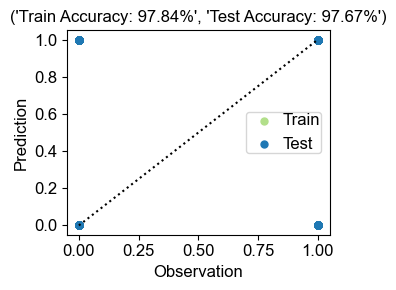

In [190]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=30,
                                     max_depth =6,
                                     random_state=1)

# Fit to the training set
rf_classifier.fit(X_train, y_train)

# Perform predictions on both training and test sets
y_train_hat = rf_classifier.predict(X_train)
y_test_hat = rf_classifier.predict(X_test)

# Visualize the results
prediction_vs_ground_truth_fig(y_train, y_train_hat, y_test, y_test_hat)

In [191]:
# Use shap to explain our rf_regressor
explainerRF = shap.TreeExplainer(rf_classifier,check_additivity=False)

# Get standardized X Dataframe
X_stand_df = X
shap_values_RF_test = explainerRF.shap_values(X_stand_df)

In [192]:
#shap_values_RF_test = np.vstack(shap_values_RF_test)
#shap_values_RF_test()

In [193]:
explainerRF.expected_value

array([0.35319782, 0.64680218])

In [194]:
lst = shap_values_RF_test[0]
lst2 = shap_values_RF_test[1]

lst

array([[ 3.58689793e-06, -2.80702857e-03,  6.53342276e-04, ...,
        -8.31730423e-04,  6.32419212e-03, -4.60810802e-02],
       [ 4.61632987e-04, -4.23624558e-03, -4.45754092e-04, ...,
        -9.76280822e-05,  2.19218233e-02, -4.79966953e-02],
       [ 1.92474422e-04, -4.29558096e-03,  1.48510205e-03, ...,
        -1.76935397e-04, -1.83256934e-02,  6.10144934e-02],
       ...,
       [-1.13191834e-03, -2.67266739e-03, -1.88103812e-04, ...,
         4.24950568e-03, -1.07539598e-02,  9.00440661e-02],
       [-7.24914000e-04, -3.84605651e-03, -5.01156013e-04, ...,
        -5.45005340e-03,  2.60042990e-03,  2.95951423e-02],
       [-3.42268019e-04, -1.42721697e-03, -2.35972856e-04, ...,
         1.95456377e-03, -7.55220345e-03, -7.22611442e-02]])

#### Below is the correct one // just diff sign to above 

What if we want to check how the trend is for the whole dataset?

What about the feature importance ranks?

The yellow indicates high feature value, and the purple indicates low feature value. The SHAP value represents our degradation parameters, which is $y$ in our models.

In [195]:
plt.figure()
shap.summary_plot(shap_values_RF_test, X,plot_type = "bar",
                            #color=plt.get_cmap("plasma"),
                           show = False)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})

# Change the colormap of the artists, UNCOMMENT FOR DEFAULT COLORMAP
my_cmap = plt.get_cmap('viridis')
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)

plt.tight_layout()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


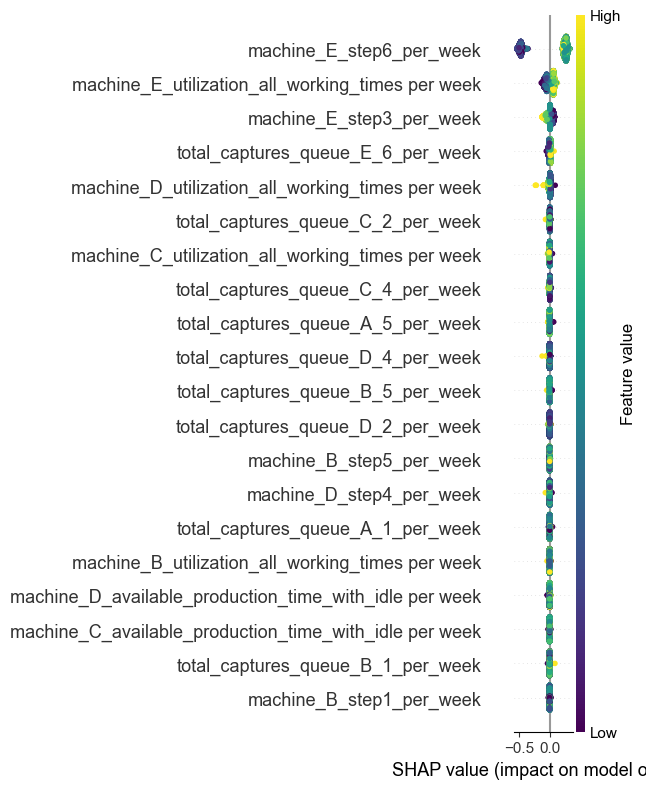

In [197]:
plt.figure()
summary = shap.summary_plot(shap_values_RF_test[1], X_stan,plot_type = "dot", color=plt.get_cmap("plasma"),show = False)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})
# plt.get_cmap("plasma")

# Change the colormap of the artists, UNCOMMENT FOR DEFAULT COLORMAP
my_cmap = plt.get_cmap('viridis')
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)

plt.tight_layout()

### 6b. Gradient Boosting Decision Tree SHAP
This is the SHAP result for gradient boosting decision tree regression.

In [199]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=GradientBoostingClassifier(),
        param_grid={
            'max_depth': range(1,5),
            'n_estimators': (5,10,20,30,40,50,60,70,80,90,100,500,1000),
        },
        cv=10, 
        scoring= 'accuracy', 
        #'neg_mean_squared_error',
        verbose=0,
        n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    return best_params

print('The best parameters: ',rfr_model(X_train,y_train))

The best parameters:  {'max_depth': 1, 'n_estimators': 5}


In [200]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(max_depth = 2,
                                         n_estimators=70, random_state=1)
#if I change the value into the best parameters above, the figure below will be changed and looks weird).


# Fit to the training set
gb_classifier.fit(X_train, y_train)

# Perform predictions on both training and test sets
y_train_hat = gb_classifier.predict(X_train)
y_test_hat = gb_classifier.predict(X_test)

# Visualize the results
prediction_vs_ground_truth_fig(y_train, y_train_hat, y_test, y_test_hat)

In [201]:
# Use shap to explain our gb_regressor
explainerGB = shap.TreeExplainer(gb_classifier,check_additivity=False)

# Get standardized X Dataframe
X_stand_df = X
shap_values_GB_test = explainerGB.shap_values(X_stand_df)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


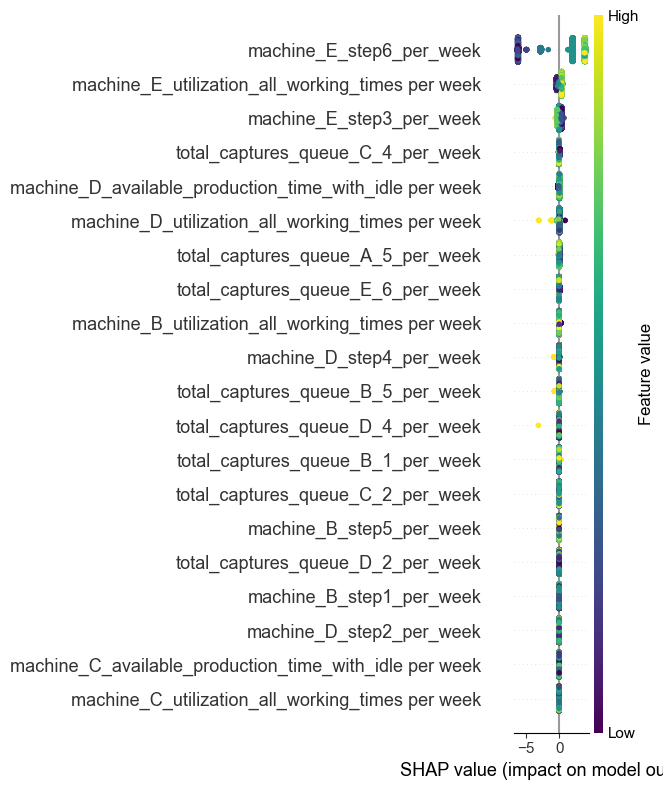

In [202]:
plt.figure()
summary = shap.summary_plot(shap_values_GB_test, X_stand_df,plot_type = "dot",
                            color=plt.get_cmap("plasma"),
                           show = False)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})
# plt.get_cmap("plasma")

# Change the colormap of the artists, UNCOMMENT FOR DEFAULT COLORMAP
my_cmap = plt.get_cmap('viridis')
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)

plt.tight_layout()

Feature  Coefficients
0                   total_captures_queue_A_1_per_week         0.000
1                   total_captures_queue_A_5_per_week         0.034
2                   total_captures_queue_B_1_per_week         0.000
3                   total_captures_queue_B_5_per_week         0.003
4                   total_captures_queue_C_2_per_week         0.000
5                   total_captures_queue_C_4_per_week         0.050
6                   total_captures_queue_D_2_per_week         0.000
7                   total_captures_queue_D_4_per_week         0.001
8                   total_captures_queue_E_6_per_week         0.028
9                            machine_B_step1_per_week         0.000
10                           machine_B_step5_per_week         0.000
11                           machine_D_step2_per_week         0.000
12                           machine_D_step4_per_week         0.007
13                           machine_E_step3_per_week         0.210
14                           machine_E_step6_per_week         3.919
15  machine_C_available_production_time_with_idle ...         0.000
16  machine_D_available_production_time_with_idle ...         0.046
17   machine_B_utilization_all_working_times per week         0.022
18   machine_C_utilization_all_working_times per week         0.000
19   machine_D_utilization_all_working_times per week         0.041
20   machine_E_utilization_all_working_times per week         0.278

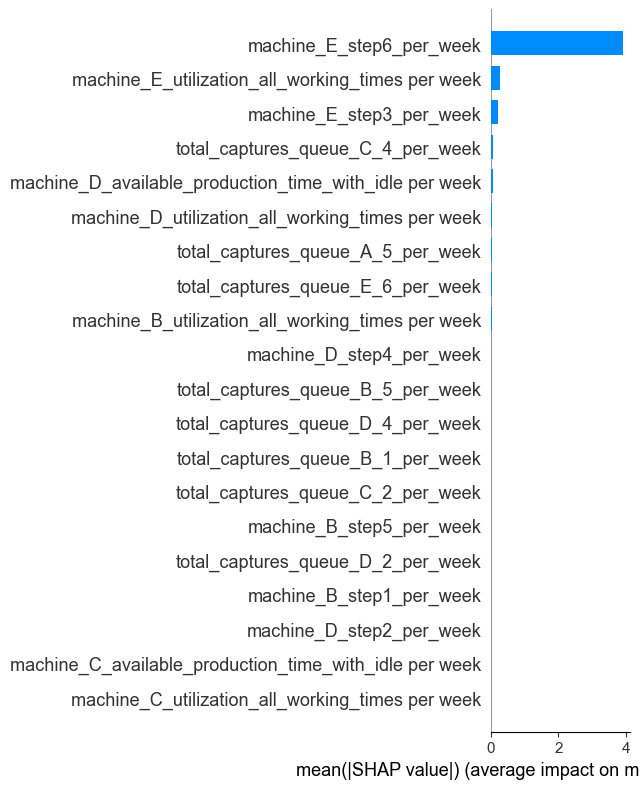

In [203]:
plt.figure()
summary = shap.summary_plot(shap_values_GB_test, X_stand_df,plot_type = "bar",
                            show = False)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})

plt.tight_layout()
d = {'Feature':list(X.columns),'Coefficients':np.round(abs(shap_values_GB_test).mean(axis=0),3).tolist()}
coefdf = pd.DataFrame(d)
coefdf.head(30)

### Try with Standardized Data

In [204]:
# Use shap to explain our gb_regressor
explainerGB = shap.TreeExplainer(gb_classifier,check_additivity=False)

# Get standardized X Dataframe
shap_values_GB_test = explainerGB.shap_values(X_stan)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


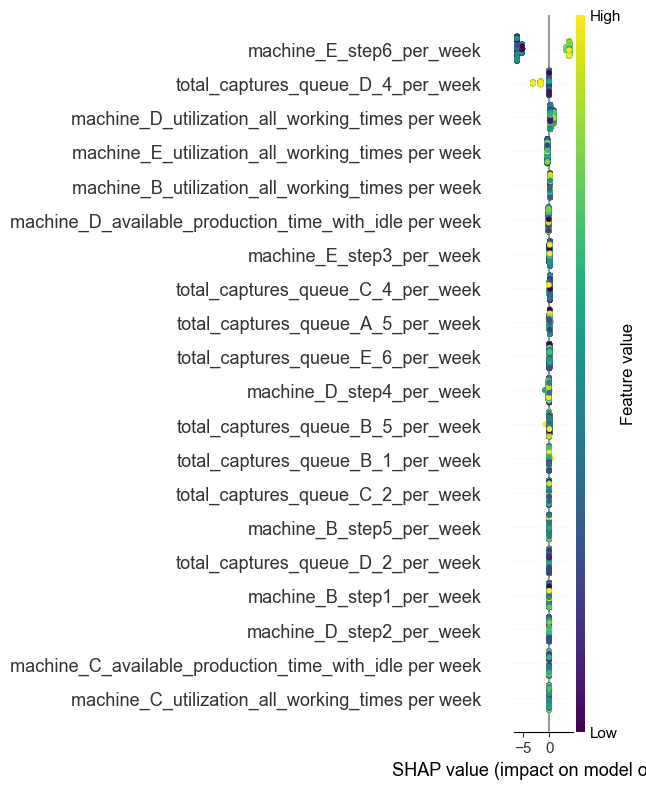

In [205]:
plt.figure()
summary = shap.summary_plot(shap_values_GB_test, X_stan, plot_type = "dot",
                            color=plt.get_cmap("plasma"),
                           show = False)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})
# plt.get_cmap("plasma")

# Change the colormap of the artists, UNCOMMENT FOR DEFAULT COLORMAP
my_cmap = plt.get_cmap('viridis')
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)

plt.tight_layout()

### 6c. Logistic Regression SHAP
This is the SHAP result for logistic regression.

In [206]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_regressor = LogisticRegression()

# Fit to the training set
lr = lr_regressor.fit(X_train, y_train)

# Perform predictions on both training and test sets
# y_train_hat = lr_regressor.predict(X_train_stand)
# y_test_hat = lr_regressor.predict(X_test_stand)

# # Visualize the results
# prediction_vs_ground_truth_fig(y_train, y_train_hat, y_test, y_test_hat)
# # prediction_vs_ground_truth_both_fig(y_train, y_train_hat_std, y_test, y_test_hat_std,
# #                                        y_train_hat_nonstd, y_test_hat_nonstd)
# print(np.abs(lr_regressor.coef_))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


https://shap-lrjball.readthedocs.io/en/docs_update/generated/shap.SamplingExplainer.html

In [208]:
X

total_captures_queue_A_1_per_week  total_captures_queue_A_5_per_week  \
0                               1.437500                           2.568452   
1                               1.363095                           2.571429   
2                               1.723214                           2.717262   
3                               1.226190                           2.657738   
4                               2.062500                           2.559524   
...                                  ...                                ...   
10081                           1.681548                           2.651786   
10082                           1.169643                           2.815476   
10083                           1.482143                           2.910714   
10084                           1.857143                           2.482143   
10085                           1.604167                           2.836310   

       total_captures_queue_B_1_per_week  total_captures_queue_B_5_per_week  \
0                               1.687500                           2.163690   
1                               1.422619                           2.619048   
2                               1.785714                           2.550595   
3                               1.184524                           2.565476   
4                               1.437500                           2.738095   
...                                  ...                                ...   
10081                           1.255952                           2.916667   
10082                           1.339286                           2.181548   
10083                           1.651786                           2.622024   
10084                           1.285714                           2.639881   
10085                           1.306548                           2.541667   

       total_captures_queue_C_2_per_week  total_captures_queue_C_4_per_week  \
0                               0.446429                           0.455357   
1                               0.383929                           0.336310   
2                               0.377976                           0.550595   
3                               0.744048                           0.511905   
4                               0.404762                           0.485119   
...                                  ...                                ...   
10081                           0.500000                           0.514881   
10082                           0.404762                           0.312500   
10083                           0.407738                           0.520833   
10084                           0.464286                           0.383929   
10085                           0.532738                           0.502976   

       total_captures_queue_D_2_per_week  total_captures_queue_D_4_per_week  \
0                               0.428571                           0.247024   
1                               0.232143                           0.181548   
2                               0.258929                           0.306548   
3                               0.366071                           0.517857   
4                               0.375000                           0.241071   
...                                  ...                                ...   
10081                           0.294643                           0.244048   
10082                           0.351190                           0.154762   
10083                           0.309524                           0.318452   
10084                           0.264881                           0.324405   
10085                           0.375000                           0.226190   

       total_captures_queue_E_6_per_week  machine_B_step1_per_week  ...  \
0                               2.250000                  0.038690  ...   
1                               2.592262                  0.0

In [209]:
# Use shap to explain our gb_regressor
X1 = shap.sample(X, 100) #shap.kmeans(X, 100)

#need to replace X with X_stand


lr_explainer = shap.KernelExplainer(lr_regressor.predict,X1)
lr_shap_values = lr_explainer.shap_values(X1)

X does not have valid feature names, but LogisticRegression was fitted with feature names


  0%|          | 0/100 [00:00<?, ?it/s]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

In [210]:
lr_shap_values

array([[ 0.01448566,  0.03859664, -0.01342316, ..., -0.06274839,
         0.13208692,  0.13189581],
       [-0.0027604 ,  0.05720003,  0.01632597, ..., -0.03297194,
         0.10047289,  0.08508323],
       [ 0.00657845, -0.12662686,  0.07578911, ...,  0.266941  ,
        -0.51028954, -0.09834147],
       ...,
       [ 0.        ,  0.01638761, -0.00404458, ...,  0.04750724,
         0.10820371,  0.04985818],
       [ 0.00139902,  0.02075297, -0.00517979, ...,  0.15183162,
         0.11821452,  0.01192422],
       [ 0.        ,  0.02291305, -0.00295632, ...,  0.34265676,
         0.08060276, -0.15354127]])

In [211]:
X_stan

total_captures_queue_A_1_per_week  total_captures_queue_A_5_per_week  \
0                              -0.411028                          -1.455593   
1                              -0.706868                          -1.444087   
2                               0.725000                          -0.880283   
3                              -1.251215                          -1.110407   
4                               2.074033                          -1.490111   
...                                  ...                                ...   
10081                           0.559329                          -1.133420   
10082                          -1.476054                          -0.500579   
10083                          -0.233523                          -0.132381   
10084                           1.257513                          -1.789272   
10085                           0.251655                          -0.420036   

       total_captures_queue_B_1_per_week  total_captures_queue_B_5_per_week  \
0                               0.960548                          -2.151556   
1                              -0.122227                          -0.384988   
2                               1.362027                          -0.650551   
3                              -1.095508                          -0.592820   
4                              -0.061397                           0.076859   
...                                  ...                                ...   
10081                          -0.803524                           0.769631   
10082                          -0.462875                          -2.082278   
10083                           0.814556                          -0.373442   
10084                          -0.681864                          -0.304165   
10085                          -0.596702                          -0.685189   

       total_captures_queue_C_2_per_week  total_captures_queue_C_4_per_week  \
0                               0.171870                           0.645203   
1                              -0.484081                          -0.707902   
2                              -0.546552                           1.727688   
3                               3.295445                           1.287928   
4                              -0.265430                           0.983480   
...                                  ...                                ...   
10081                           0.734114                           1.321756   
10082                          -0.265430                          -0.978524   
10083                          -0.234195                           1.389411   
10084                           0.359285                          -0.166660   
10085                           1.077707                           1.186445   

       total_captures_queue_D_2_per_week  total_captures_queue_D_4_per_week  \
0                               1.797643                           0.068787   
1                              -0.666119                          -0.786569   
2                              -0.330152                           0.846382   
3                               1.013719                           3.606846   
4                               1.125708                          -0.008973   
...                                  ...                                ...   
10081                           0.117805                           0.029907   
10082                           0.827070                          -1.136486   
10083                           0.304454                           1.001901   
10084                          -0.255492                           1.079661   
10085                           1.125708                          -0.203372   

       total_captures_queue_E_6_per_week  machine_B_step1_per_week  ...  \
0                              -0.694471                 -0.637392  ...   
1                               0.200006                  0.1

In [212]:
# Use shap to explain our gb_regressor
X2 = shap.sample(X_stan) #shap.kmeans(X, 100)

#need to replace X with X_stand


lr_explainer1 = shap.KernelExplainer(lr_regressor.predict,X2)
lr_shap_values1 = lr_explainer1.shap_values(X2)

X does not have valid feature names, but LogisticRegression was fitted with feature names


  0%|          | 0/100 [00:00<?, ?it/s]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

In [213]:
lr_shap_values1

array([[ 0.05064003,  0.18417667, -0.05036604, ..., -0.05539821,
         0.05374791,  0.09401759],
       [-0.0114204 ,  0.14260269,  0.04571461, ..., -0.01945857,
         0.04448303,  0.06121054],
       [ 0.00382892, -0.12773584,  0.09940236, ...,  0.06395007,
        -0.10012662, -0.04068776],
       ...,
       [-0.00729152,  0.08535608, -0.01368296, ...,  0.02518673,
         0.12991468,  0.04920997],
       [ 0.01007013,  0.15717499, -0.03865449, ...,  0.12901186,
         0.11066598,  0.00222504],
       [-0.00506722,  0.07795405, -0.00175822, ...,  0.09615311,
         0.02251776, -0.11105136]])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


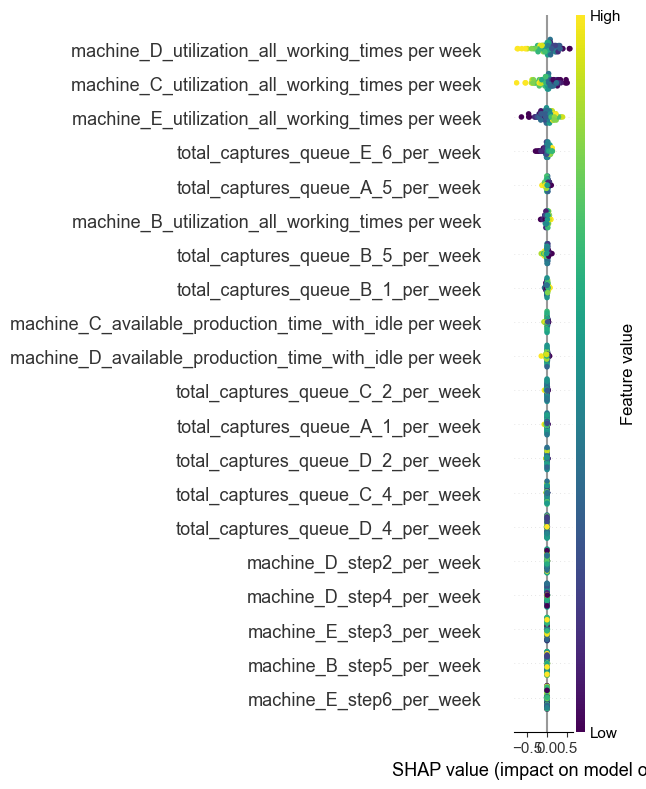

In [214]:
#Need to use X1 (After doing sampling - due to high background data)
#need to be the same as the lr_shap_values

plt.figure()
summary = shap.summary_plot(lr_shap_values, X1, plot_type = "dot",
                            color=plt.get_cmap("plasma"),
                           show = False)

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})

# Change the colormap of the artists, UNCOMMENT FOR DEFAULT COLORMAP
my_cmap = plt.get_cmap('viridis')
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)

plt.tight_layout()

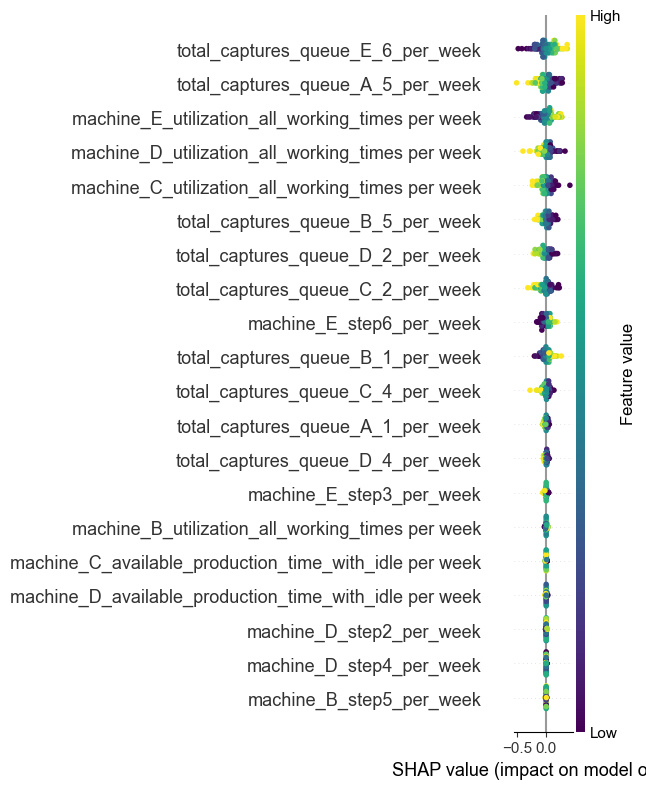

In [215]:
#Need to use X1 (After doing sampling - due to high background data)
#need to be the same as the lr_shap_values

plt.figure()
summary = shap.summary_plot(lr_shap_values1, X2, plot_type = "dot",
                            color=plt.get_cmap("plasma"),
                           show = False)

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})

# Change the colormap of the artists, UNCOMMENT FOR DEFAULT COLORMAP
my_cmap = plt.get_cmap('viridis')
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)

plt.tight_layout()

In [216]:
plt.figure()
summary = shap.summary_plot(lr_shap_values1, X2,plot_type = "bar",show = False)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})
plt.tight_layout()
d = {'Feature':list(X.columns),'Mean |SHAP| Value':np.round(abs(lr_shap_values).mean(axis=0),3).tolist()}
coefdf = pd.DataFrame(d)
coefdf.head(30)

Feature  Mean |SHAP| Value
0                   total_captures_queue_A_1_per_week              0.006
1                   total_captures_queue_A_5_per_week              0.032
2                   total_captures_queue_B_1_per_week              0.015
3                   total_captures_queue_B_5_per_week              0.023
4                   total_captures_queue_C_2_per_week              0.006
5                   total_captures_queue_C_4_per_week              0.004
6                   total_captures_queue_D_2_per_week              0.005
7                   total_captures_queue_D_4_per_week              0.002
8                   total_captures_queue_E_6_per_week              0.057
9                            machine_B_step1_per_week              0.001
10                           machine_B_step5_per_week              0.001
11                           machine_D_step2_per_week              0.001
12                           machine_D_step4_per_week              0.001
13                           machine_E_step3_per_week              0.001
14                           machine_E_step6_per_week              0.001
15  machine_C_available_production_time_with_idle ...              0.013
16  machine_D_available_production_time_with_idle ...              0.011
17   machine_B_utilization_all_working_times per week              0.032
18   machine_C_utilization_all_working_times per week              0.168
19   machine_D_utilization_all_working_times per week              0.171
20   machine_E_utilization_all_working_times per week              0.132

### 6d. SVC SHAP
This is the SHAP result for support vector machine classifier.

In [217]:
#sv_classifier = SVC(C=300000,kernel='rbf')
sv_classifier = SVC(C=5000000,kernel='rbf') #after tuning above

# Fit to the training set
sv_classifier.fit(X_train, y_train)
# Perform predictions on both training and test sets
# y_train_hat = sv_regressor.predict(X_train)
# y_test_hat = sv_regressor.predict(X_test)

# # Visualize the results
# prediction_vs_ground_truth_fig(y_train, y_train_hat, y_test, y_test_hat)

SVC(C=5000000)

In [218]:
X

total_captures_queue_A_1_per_week  total_captures_queue_A_5_per_week  \
0                               1.437500                           2.568452   
1                               1.363095                           2.571429   
2                               1.723214                           2.717262   
3                               1.226190                           2.657738   
4                               2.062500                           2.559524   
...                                  ...                                ...   
10081                           1.681548                           2.651786   
10082                           1.169643                           2.815476   
10083                           1.482143                           2.910714   
10084                           1.857143                           2.482143   
10085                           1.604167                           2.836310   

       total_captures_queue_B_1_per_week  total_captures_queue_B_5_per_week  \
0                               1.687500                           2.163690   
1                               1.422619                           2.619048   
2                               1.785714                           2.550595   
3                               1.184524                           2.565476   
4                               1.437500                           2.738095   
...                                  ...                                ...   
10081                           1.255952                           2.916667   
10082                           1.339286                           2.181548   
10083                           1.651786                           2.622024   
10084                           1.285714                           2.639881   
10085                           1.306548                           2.541667   

       total_captures_queue_C_2_per_week  total_captures_queue_C_4_per_week  \
0                               0.446429                           0.455357   
1                               0.383929                           0.336310   
2                               0.377976                           0.550595   
3                               0.744048                           0.511905   
4                               0.404762                           0.485119   
...                                  ...                                ...   
10081                           0.500000                           0.514881   
10082                           0.404762                           0.312500   
10083                           0.407738                           0.520833   
10084                           0.464286                           0.383929   
10085                           0.532738                           0.502976   

       total_captures_queue_D_2_per_week  total_captures_queue_D_4_per_week  \
0                               0.428571                           0.247024   
1                               0.232143                           0.181548   
2                               0.258929                           0.306548   
3                               0.366071                           0.517857   
4                               0.375000                           0.241071   
...                                  ...                                ...   
10081                           0.294643                           0.244048   
10082                           0.351190                           0.154762   
10083                           0.309524                           0.318452   
10084                           0.264881                           0.324405   
10085                           0.375000                           0.226190   

       total_captures_queue_E_6_per_week  machine_B_step1_per_week  ...  \
0                               2.250000                  0.038690  ...   
1                               2.592262                  0.0

In [219]:
X1 = shap.sample(X, 100) #shap.kmeans(X, 100)
#non-standardized data is fine

svm_explainer = shap.KernelExplainer(sv_classifier.predict,X1)
svm_shap_values = svm_explainer.shap_values(X1)

X does not have valid feature names, but SVC was fitted with feature names


  0%|          | 0/100 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

In [220]:
#Need to use X1 (After doing sampling - due to high background data)
#need to be the same as the lr_shap_values

plt.figure()
summary = shap.summary_plot(svm_shap_values, X1,plot_type = "dot",
                            color=plt.get_cmap("plasma"),
                           show = False)

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})

# Change the colormap of the artists, UNCOMMENT FOR DEFAULT COLORMAP
my_cmap = plt.get_cmap('viridis')
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)

plt.tight_layout()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Feature  Mean |SHAP| Value
0                   total_captures_queue_A_1_per_week              0.004
1                   total_captures_queue_A_5_per_week              0.002
2                   total_captures_queue_B_1_per_week              0.002
3                   total_captures_queue_B_5_per_week              0.006
4                   total_captures_queue_C_2_per_week              0.003
5                   total_captures_queue_C_4_per_week              0.004
6                   total_captures_queue_D_2_per_week              0.002
7                   total_captures_queue_D_4_per_week              0.002
8                   total_captures_queue_E_6_per_week              0.001
9                            machine_B_step1_per_week              0.001
10                           machine_B_step5_per_week              0.001
11                           machine_D_step2_per_week              0.001
12                           machine_D_step4_per_week              0.001
13                           machine_E_step3_per_week              0.013
14                           machine_E_step6_per_week              0.373
15  machine_C_available_production_time_with_idle ...              0.003
16  machine_D_available_production_time_with_idle ...              0.002
17   machine_B_utilization_all_working_times per week              0.003
18   machine_C_utilization_all_working_times per week              0.019
19   machine_D_utilization_all_working_times per week              0.010
20   machine_E_utilization_all_working_times per week              0.030

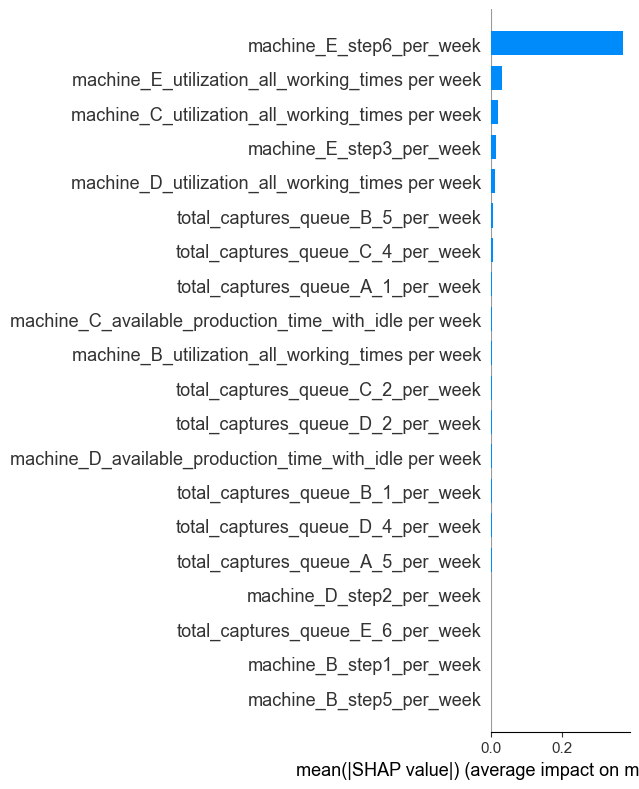

In [221]:
plt.figure()
summary = shap.summary_plot(svm_shap_values, X_stand_df,plot_type = "bar",show = False)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})
plt.tight_layout()
d = {'Feature':list(X.columns),'Mean |SHAP| Value':np.round(abs(svm_shap_values).mean(axis=0),3).tolist()}
coefdf = pd.DataFrame(d)
coefdf.head(25)

### 6e. NN/ MLP SHAP
This is the SHAP result for multi-layer perceptron classifier.

In [222]:
#using the result from the tuning section
nn_classifier = MLPClassifier(hidden_layer_sizes =(150,),max_iter=1000,
                           learning_rate='constant',solver='lbfgs',alpha=0.0001,
                           activation='logistic')
nn_classifier.fit(X_train_stand, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(150,), max_iter=1000,
              solver='lbfgs')

In [223]:
X2 = shap.sample(X_stan, 300) #shap.kmeans(X, 100)

nn_explainer = shap.KernelExplainer(nn_classifier.predict,X2)
nn_shap_values = nn_explainer.shap_values(X2)

Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/300 [00:00<?, ?it/s]

In [224]:
plt.figure()
summary = shap.summary_plot(nn_shap_values, X2 ,plot_type = "dot",
                            color=plt.get_cmap("plasma"),
                           show = False)

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})

# Change the colormap of the artists, UNCOMMENT FOR DEFAULT COLORMAP
my_cmap = plt.get_cmap('viridis')
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)

plt.tight_layout()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Feature  Coefficients
0                   total_captures_queue_A_1_per_week         0.004
1                   total_captures_queue_A_5_per_week         0.003
2                   total_captures_queue_B_1_per_week         0.003
3                   total_captures_queue_B_5_per_week         0.003
4                   total_captures_queue_C_2_per_week         0.003
5                   total_captures_queue_C_4_per_week         0.005
6                   total_captures_queue_D_2_per_week         0.004
7                   total_captures_queue_D_4_per_week         0.003
8                   total_captures_queue_E_6_per_week         0.003
9                            machine_B_step1_per_week         0.003
10                           machine_B_step5_per_week         0.004
11                           machine_D_step2_per_week         0.003
12                           machine_D_step4_per_week         0.003
13                           machine_E_step3_per_week         0.024
14                           machine_E_step6_per_week         0.407
15  machine_C_available_production_time_with_idle ...         0.004
16  machine_D_available_production_time_with_idle ...         0.004
17   machine_B_utilization_all_working_times per week         0.004
18   machine_C_utilization_all_working_times per week         0.003
19   machine_D_utilization_all_working_times per week         0.004
20   machine_E_utilization_all_working_times per week         0.028

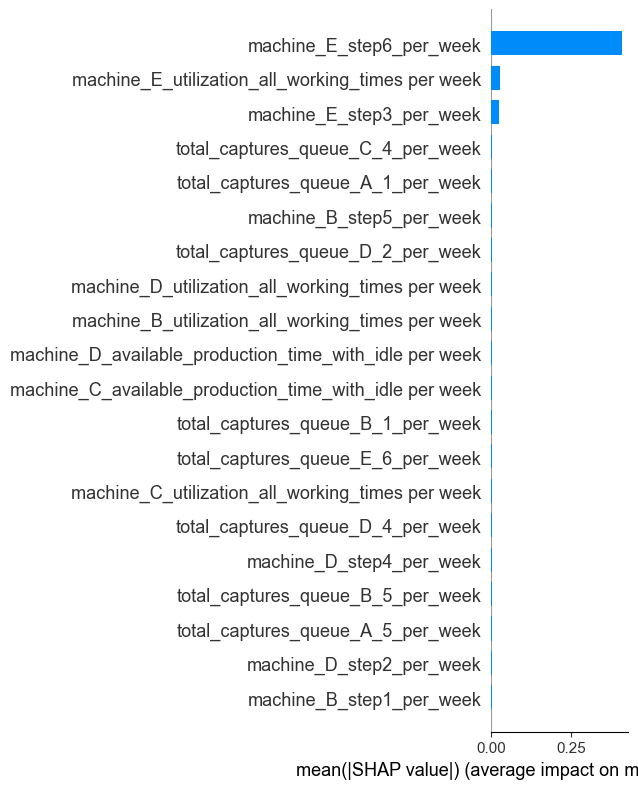

In [225]:
plt.figure()
summary = shap.summary_plot(nn_shap_values, X2,plot_type = "bar",show = False)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})
plt.tight_layout()
d = {'Feature':list(X.columns),'Coefficients':np.round(abs(nn_shap_values).mean(axis=0),3).tolist()}
coefdf = pd.DataFrame(d)
coefdf.head(30)

### 6f. KNN SHAP
This is the SHAP result for k-Nearest Neighbors

In [226]:
#knn_classifier = KNeighborsClassifier(algorithm='ball_tree',
#                                   n_neighbors=15,
#                                   weights='distance')

knn_classifier =  KNeighborsClassifier(algorithm='ball_tree',
                                   n_neighbors=18,
                                   weights='uniform')
# Fit to the training set
knn_classifier.fit(X_train_stand, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=18)

In [227]:
X2 = shap.sample(X_stan, 100) #shap.kmeans(X, 100)

knn_explainer = shap.KernelExplainer(knn_classifier.predict,X2)
knn_shap_values = knn_explainer.shap_values(X2)

  0%|          | 0/100 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


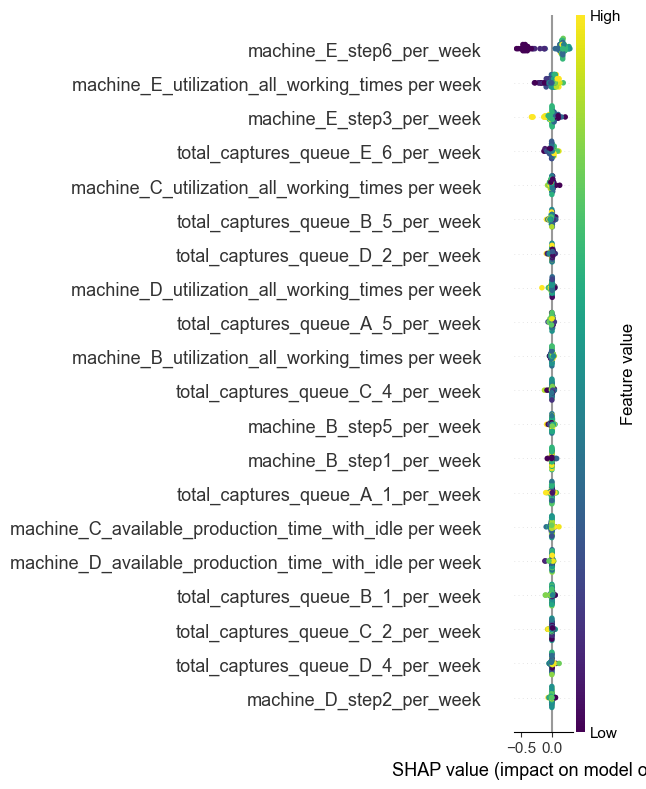

In [228]:
plt.figure()
summary = shap.summary_plot(knn_shap_values, X2,plot_type = "dot",
                            color=plt.get_cmap("plasma"),
                           show = False)

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})

# Change the colormap of the artists, UNCOMMENT FOR DEFAULT COLORMAP
my_cmap = plt.get_cmap('viridis')
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)

plt.tight_layout()

Feature  Coefficients
0                   total_captures_queue_A_1_per_week         0.009
1                   total_captures_queue_A_5_per_week         0.012
2                   total_captures_queue_B_1_per_week         0.009
3                   total_captures_queue_B_5_per_week         0.016
4                   total_captures_queue_C_2_per_week         0.009
5                   total_captures_queue_C_4_per_week         0.010
6                   total_captures_queue_D_2_per_week         0.014
7                   total_captures_queue_D_4_per_week         0.009
8                   total_captures_queue_E_6_per_week         0.023
9                            machine_B_step1_per_week         0.010
10                           machine_B_step5_per_week         0.010
11                           machine_D_step2_per_week         0.008
12                           machine_D_step4_per_week         0.006
13                           machine_E_step3_per_week         0.053
14                           machine_E_step6_per_week         0.239
15  machine_C_available_production_time_with_idle ...         0.009
16  machine_D_available_production_time_with_idle ...         0.009
17   machine_B_utilization_all_working_times per week         0.011
18   machine_C_utilization_all_working_times per week         0.016
19   machine_D_utilization_all_working_times per week         0.012
20   machine_E_utilization_all_working_times per week         0.068

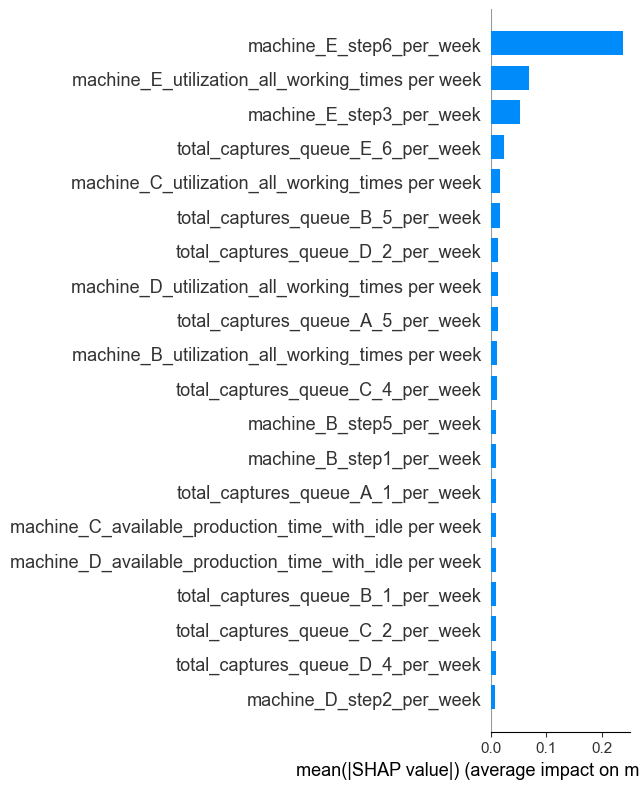

In [229]:
plt.figure()
summary = shap.summary_plot(knn_shap_values, X_stand_df,plot_type = "bar",show = False)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'font.size': 60})
plt.tight_layout()
d = {'Feature':list(X.columns),'Coefficients':np.round(abs(knn_shap_values).mean(axis=0),3).tolist()}
coefdf = pd.DataFrame(d)
coefdf.head(30)